**Regrassão Linear**

Gerando um dados de aparência linear para testar a **Solução de Forma Fechada** ou **Equação Normal**

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

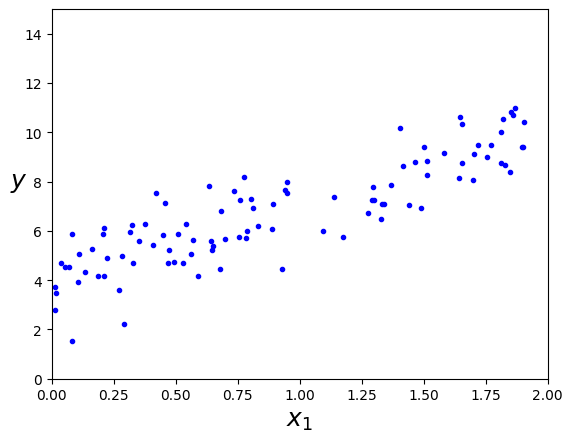

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Calculando o **θ^** usando a equação normal.

**θ = (X^T * X)⁻1 * X^T * y**

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.01652753],
       [2.99795928]])

**Destrinchando o código acima:**

np.linalg.inv(X_b.T.dot(X_b)): chamando o linalg() para poder usar a função inv() que fará a inversa da multiplicação

X_b.T.dot(X_b): Fará a multiplicação da matriz X_b transposta com a matriz X_b

(X_b.T).dot(y): multiplica a matriz transposta X_b com o vetor y

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.01652753],
       [10.0124461 ]])

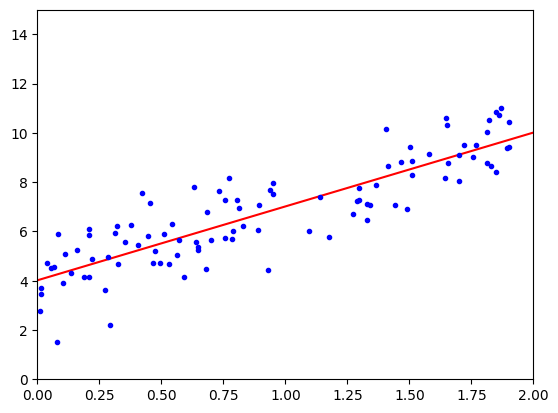

In [13]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Usando a Regressão Linear com Scikit-Learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.01652753]), array([[2.99795928]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.01652753],
       [10.0124461 ]])

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01652753],
       [2.99795928]])

A classe LinearRegression é feita baseada na função scipy.linalg.lstsq()

Esta função calcula X+ a pseudoinversa de X, também pode ser calculada desta forma:

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[4.01652753],
       [2.99795928]])

É preferível usar a pseudoinversa, pois com ela é possível calcular matrizes que não são inversíveis.

**Gradiente Descendente**

In [20]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [21]:
theta

array([[4.01652753],
       [2.99795928]])

Para encontrar os melhores parâmetros podemos utilizar o GridSearch do cápitulo 2.